In [77]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.regularizers import l2
import numpy as np

In [78]:
datagen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=10)

In [106]:
train=datagen.flow_from_directory('/home/user/fer2013/train',target_size=(48,48),color_mode = 'grayscale')
test=datagen.flow_from_directory('/home/user/fer2013/validation',target_size=(48,48),color_mode = 'grayscale')

Found 24139 images belonging to 5 classes.
Found 2901 images belonging to 5 classes.


In [80]:
class_labels=train.class_indices
class_labels={k:v for v,k in class_labels.items()}
classes = list(class_labels.values())
class_labels

{0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}

Neutral


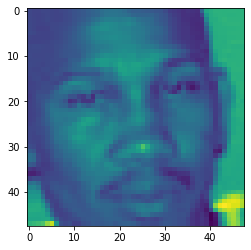

Neutral


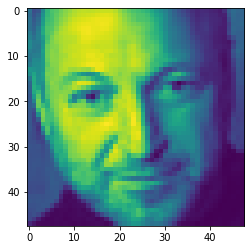

Neutral


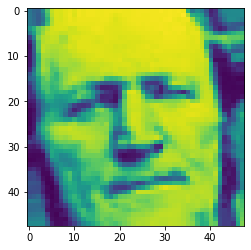

Happy


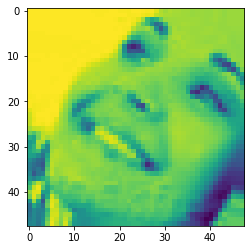

Sad


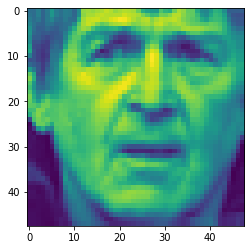

Sad


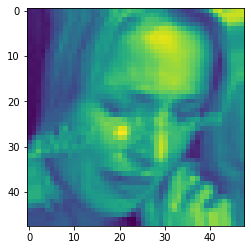

In [81]:
for i in [0,5,10,15,20,25]:
    result=np.argmax(train[0][1][i])
    print(classes[result])
    plt.imshow(train[0][0][i])
    plt.show()

In [82]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1),padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Dropout(.4))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Dropout(.4))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(.4))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 256)       295168    
_________________________________________________________________
dropout_7 (Dropout)          (None, 48, 48, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 589824)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [83]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [84]:
history = model.fit(train,batch_size = 5, epochs = 20)

Epoch 1/20
755/755 [==============================] - 654s 867ms/step - loss: 1.5320 - accuracy: 0.3422
Epoch 2/20
755/755 [==============================] - 659s 873ms/step - loss: 1.3878 - accuracy: 0.4165
Epoch 3/20
755/755 [==============================] - 686s 908ms/step - loss: 1.3298 - accuracy: 0.4452
Epoch 4/20
755/755 [==============================] - 786s 1s/step - loss: 1.2752 - accuracy: 0.4705
Epoch 5/20
755/755 [==============================] - 937s 1s/step - loss: 1.2276 - accuracy: 0.4903
Epoch 6/20
755/755 [==============================] - 840s 1s/step - loss: 1.1929 - accuracy: 0.5081
Epoch 7/20
755/755 [==============================] - 655s 868ms/step - loss: 1.1592 - accuracy: 0.5232
Epoch 8/20
755/755 [==============================] - 655s 868ms/step - loss: 1.1390 - accuracy: 0.5284
Epoch 9/20
755/755 [==============================] - 656s 869ms/step - loss: 1.1202 - accuracy: 0.5406
Epoch 10/20
755/755 [==============================] - 655s 868ms/step - 

In [107]:
model.evaluate(test)

91/91 [==============================] - 17s 190ms/step - loss: 0.9525 - accuracy: 0.6150


[0.9524887800216675, 0.6149603724479675]


actual =  Happy
predicted =  Happy


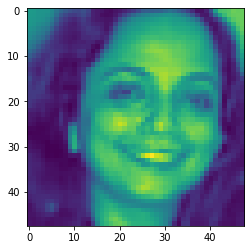


actual =  Surprise
predicted =  Surprise


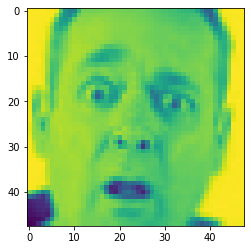


actual =  Sad
predicted =  Sad


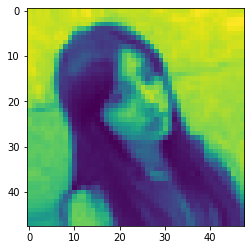


actual =  Happy
predicted =  Happy


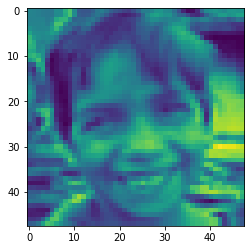


actual =  Surprise
predicted =  Surprise


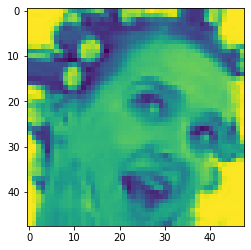


actual =  Happy
predicted =  Sad


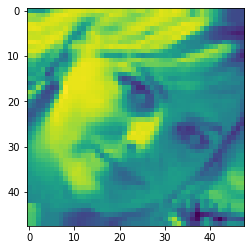


actual =  Happy
predicted =  Surprise


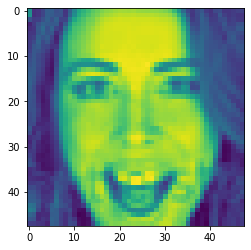


actual =  Happy
predicted =  Happy


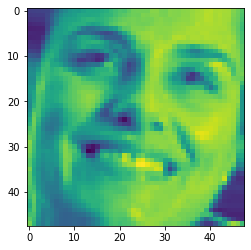


actual =  Sad
predicted =  Sad


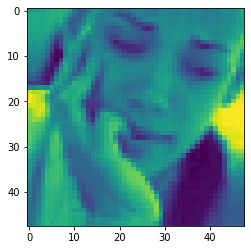


actual =  Surprise
predicted =  Surprise


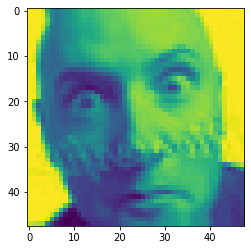


actual =  Angry
predicted =  Sad


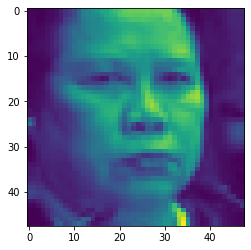


actual =  Angry
predicted =  Angry


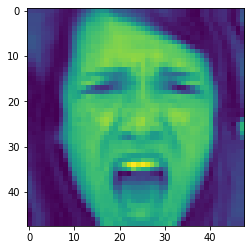


actual =  Happy
predicted =  Sad


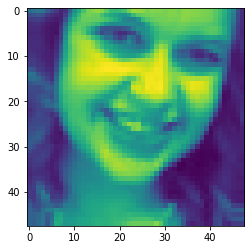


actual =  Happy
predicted =  Happy


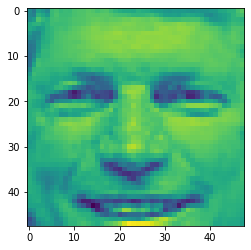


actual =  Happy
predicted =  Happy


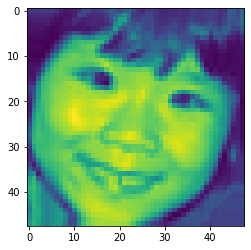

In [108]:
for i in range(0,30,2):
    result=np.argmax(test[0][1][i])
    print('\nactual = ',classes[result])
    test_image=np.expand_dims(test[0][0][i],axis=0)
    print('predicted = ',classes[np.argmax(model.predict(test_image))])
    plt.imshow(test[0][0][i])
    plt.show()

In [135]:
model.save('emotion.h5')